In [42]:
%reset -f


import numpy as np
from numba import jit,njit
import time

N=10000000
x=np.random.rand(N)

def f0(x):
    return np.log(np.abs(x))

@njit(parallel=True) 
def g1(x):
    return np.log(np.abs(x))
  

noise=np.random.rand(N)*0.1

print('numpy f0')
t=time.time()
x=np.random.rand(N)
for i in range(5):
    x=f0(x)+noise
print('time=',time.time()-t)


print('njit g0')
t=time.time()
x=np.random.rand(N)
x=g1(x)
for i in range(4):
    x=g1(x)+noise
print('time=',time.time()-t)    

 

numpy f0
time= 2.653998851776123
njit g0
time= 2.593999147415161


time= 0.33100080490112305


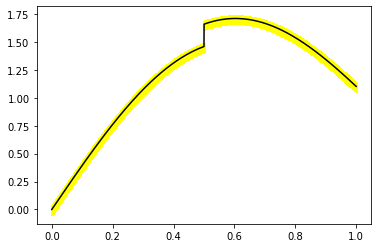

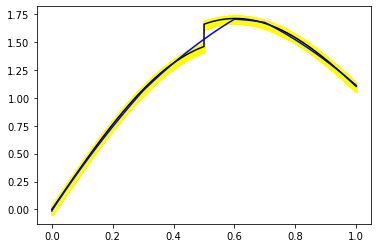

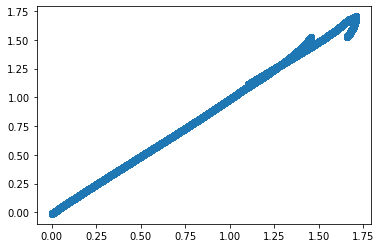

In [103]:
%reset -f


import numpy as np
from numba import jit,njit
import time
import matplotlib.pyplot as plt
from scipy.optimize  import minimize


N=10000  #for samll N turn off njit, use pure numpy
N=1000000 #for big N turn on njit  (it can help scipy minimize)
#or sample the input (don't use the whole training, use a batch) to decrease the size then use pure numpy
#parallel=True increases the overhead, if the size is small then probably turn it off!

noise=np.floor(4*(np.random.rand(N)-0.5))*0.02
x=np.random.rand(N)
x=np.sort(x)
y=np.sin(3*x)+np.tanh(x)+0.2*np.heaviside(x-0.5,0)
y1=y+noise

plt.figure()
plt.scatter(x,y1,s=1,color='yellow')
plt.plot(x,y,'k')

#write the objective function as one simple function to speed it up? 
#the loss & the func calc are in the same one!! 

#@njit
#@njit(parallel=True)
def f0(b,x,y):
    return 0.5*np.mean(np.square(b[0]+b[1]*x+b[2]*x*x+b[3]*np.sqrt(x)+b[4]*np.maximum(x,0.3)+b[5]*np.maximum(x,0.7)+b[7]*np.abs(x-0.6)-y))

def f00(b,x):
    return b[0]+b[1]*x+b[2]*x*x+b[3]*np.sqrt(x)+b[4]*np.maximum(x,0.3)+b[5]*np.maximum(x,0.7)+b[7]*np.abs(x-0.6)


ind = np.random.choice(N, size=100, replace=False)

x_batch=x[ind]
y1_batch=y1[ind]

Nv=8
b=np.random.rand(Nv)

t=time.time()
f0(b,x,y)
b=minimize(f0,b,args=(x_batch,y1_batch)).x
print('time=',time.time()-t)

yhat=f00(b,x)

plt.figure()
plt.scatter(x,y1,s=1,color='yellow')
plt.plot(x,y,'k')
plt.plot(x,yhat,'b')

plt.figure()
plt.scatter(y,yhat)
